# Importing the relevant libraries



In [154]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Loading the data

In [155]:
url="http://eng.ashesi.edu.gh/~namanquah/iot/tempdata.php?listing"
df = pd.read_json(url)
df.head()

,tempID,theTime,temperature,groupName
0,2,2019-07-10 12:37:52,22.2,
1,5,2019-07-10 12:42:32,44.2,
2,6,2019-07-10 12:42:37,44.2,
3,7,2020-02-07 08:42:29,444.0,
4,8,2020-02-07 08:42:35,444.0,


# Data Cleaning and preprocessing

First,i will replace the empty spaces in the columns with NaN.

In [156]:
df = df.replace(r'^\s*$', np.nan, regex=True)


In [157]:
df.head()

,tempID,theTime,temperature,groupName
0,2,2019-07-10 12:37:52,22.2,NaN
1,5,2019-07-10 12:42:32,44.2,NaN
2,6,2019-07-10 12:42:37,44.2,NaN
3,7,2020-02-07 08:42:29,444.0,NaN
4,8,2020-02-07 08:42:35,444.0,NaN


Now, we can see the number of values that missing.

In [158]:
df.isna().sum()

tempID         0
theTime        0
temperature    0
groupName      7
dtype: int64

GroupName column has 7 missing values

### Handling missing values

I will backfill the groupName column with already exiting values.

In [159]:
df.fillna(method="bfill", inplace=True)

In [160]:
df.head()

,tempID,theTime,temperature,groupName
0,2,2019-07-10 12:37:52,22.2,{groupName}
1,5,2019-07-10 12:42:32,44.2,{groupName}
2,6,2019-07-10 12:42:37,44.2,{groupName}
3,7,2020-02-07 08:42:29,444.0,{groupName}
4,8,2020-02-07 08:42:35,444.0,{groupName}


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tempID       22823 non-null  int64  
 1   theTime      22823 non-null  object 
 2   temperature  22823 non-null  float64
 3   groupName    22823 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 713.3+ KB


It can be seen that theTime is not a datetime object. So I will convert that column to a dateTime Object

In [162]:
df['theTime']= pd.to_datetime(df['theTime']) 

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tempID       22823 non-null  int64         
 1   theTime      22823 non-null  datetime64[ns]
 2   temperature  22823 non-null  float64       
 3   groupName    22823 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 713.3+ KB


Now, theTime column is now a datetime object.

## Adding more columns to the data

In [164]:
df['weekday'] = df['theTime'].dt.dayofweek

In [165]:
df['month'] = df['theTime'].dt.month

In [166]:
df.head()

,tempID,theTime,temperature,groupName,weekday,month
0,2,2019-07-10 12:37:52,22.2,{groupName},2,7
1,5,2019-07-10 12:42:32,44.2,{groupName},2,7
2,6,2019-07-10 12:42:37,44.2,{groupName},2,7
3,7,2020-02-07 08:42:29,444.0,{groupName},4,2
4,8,2020-02-07 08:42:35,444.0,{groupName},4,2


In [167]:
df["groupName"].unique()

array(['{groupName}', 'Default Grp', 'Main Group', 'Area51', 'OAEK21',
       'SHEREBMAX', 'NA_TQ', 'Bauer', 'JonesK3Kumi', 'Razs', 'AyiKalk',
       'NNA', 'Sharhan', 'SHE_REB_MAX', 'sybo', 'TeamTM', 'KLMT', 'Gigi',
       'JJ', 'TN2', 'GasuAdordz', 'NA_TQ/', 'MA_T', 'GTE1', 'TeliEdna',
       'pixels', 'G1I', 'Ch', 'SANU', 'san', 'sanKad', 'sanKadHTTP/1.1',
       'SanuKadi', 'SanuKad', 'Vianney', 'NodeMCU', 'OAEK21 HTTP/1.1',
       'KASETE', 'allotei', 'T2021', 'hi', 'NY', 'hELLO', 'Jack Bauer"',
       'Jack Bauer', 'SHE_MAX_MAME'], dtype=object)

I think the time of the day is a good indicator for the temperature. So i will add another column for the time of the day.



*   0 will denote times in the morning
*   1 will be for afternoon
*   2 will be for evening



In [168]:
def codeTimeOfDay(time_hour):
  if time_hour < 12:
    return 0
  elif time_hour > 12 and time_hour < 18:
    return 1
  else:
    return 2

In [169]:
df["timeOfDay"] = df['theTime'].dt.hour.apply(lambda x: codeTimeOfDay(x))

In [170]:
df.head()

,tempID,theTime,temperature,groupName,weekday,month,timeOfDay
0,2,2019-07-10 12:37:52,22.2,{groupName},2,7,2
1,5,2019-07-10 12:42:32,44.2,{groupName},2,7,2
2,6,2019-07-10 12:42:37,44.2,{groupName},2,7,2
3,7,2020-02-07 08:42:29,444.0,{groupName},4,2,0
4,8,2020-02-07 08:42:35,444.0,{groupName},4,2,0


Now, i am going to transform the categorical groupName column to a numerical column by encoding the values

In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
labelencoder = LabelEncoder()

In [173]:
df['groupNumber'] = labelencoder.fit_transform(df['groupName'])

In [174]:
df.head()

,tempID,theTime,temperature,groupName,weekday,month,timeOfDay,groupNumber
0,2,2019-07-10 12:37:52,22.2,{groupName},2,7,2,45
1,5,2019-07-10 12:42:32,44.2,{groupName},2,7,2,45
2,6,2019-07-10 12:42:37,44.2,{groupName},2,7,2,45
3,7,2020-02-07 08:42:29,444.0,{groupName},4,2,0,45
4,8,2020-02-07 08:42:35,444.0,{groupName},4,2,0,45


In [175]:
temp_df = df[df['temperature']<1000]
temp_df = temp_df[temp_df['temperature']>-1000 ]

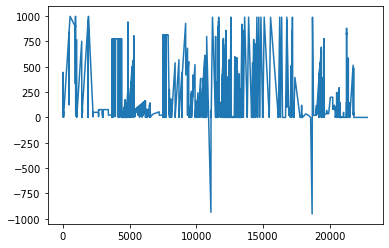

In [176]:
plt.plot(temp_df['temperature'])

# Building the model

In [177]:
x = temp_df.drop(["temperature", "tempID", "theTime", "groupName"], axis=1)
y = temp_df['temperature']

Splitting the data using train_test_split from scikit-learn

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

### Decision Tree Regressor Model

In [179]:
from sklearn.tree import DecisionTreeRegressor

temp_model = DecisionTreeRegressor()
# Fit model
temp_model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### K Nearest Neighbor

K-Nearest Neighbor (KNN) makes a prediction for a new observation by searching for the most similar training observations and pooling their values

In [180]:
from sklearn.neighbors import KNeighborsRegressor

In [181]:
model = KNeighborsRegressor()

In [182]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Evaluating the model

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [184]:
mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))

In [185]:
from math import sqrt

In [186]:
# get predicted temp on validation data
val_predictions = temp_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

155.08308438759732


In [187]:
print(mae)

161.77508296647477


### Hyperparameter Tuning

I am going to use Grid Search CrossFold Validation to find the hyperparameters with the best score.

In [188]:
from sklearn.model_selection import GridSearchCV,KFold

In [189]:
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [190]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [5,6, 7, 8, 9], 'weights': ['uniform','distance']}]

In [191]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=13, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [5, 6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [192]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.36834104273708207
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')
{'n_neighbors': 9, 'weights': 'distance'}


In [193]:
model = KNeighborsRegressor(n_neighbors=9, weights='distance')

In [194]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')

In [195]:
mae = mean_absolute_error(y_train, model.predict(X_train))
mae

149.28151859287567

In [196]:
mean_abs_errors = []
for i in range(9,20):
  model = KNeighborsRegressor(n_neighbors=i, weights='distance')
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  mean_abs_errors.append(mae)

In [197]:
mean_abs_errors

[149.28151859287567,
 149.29063079515583,
 148.5871143403949,
 147.27631715417442,
 149.06854604786793,
 148.17441714933673,
 147.58790625645943,
 147.28775669104573,
 146.62663689263533,
 146.82406157873055,
 147.3152599437593]

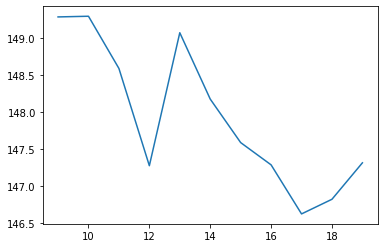

In [198]:
plt.plot(list(range(9, 20)), mean_abs_errors)

The model with the least Mean Absolute Error is the one with 17 neighbors.

In [199]:
model = KNeighborsRegressor(n_neighbors=17, weights='distance')

In [200]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='distance')

In [201]:
mae = mean_absolute_error(y_train, model.predict(X_train))
mae

146.62663689263533